In [2]:
#! /usr/bin/python3

import sys
import pennylane as qml
from pennylane import numpy as np

In [3]:
def array_to_concatenated_string(array):
    """DO NOT MODIFY THIS FUNCTION.
    Turns an array of integers into a concatenated string of integers
    separated by commas. (Inverse of concatenated_string_to_array).
    """
    return ",".join(str(x) for x in array)


def concatenated_string_to_array(string):
    """DO NOT MODIFY THIS FUNCTION.
    Turns a concatenated string of integers separated by commas into
    an array of integers. (Inverse of array_to_concatenated_string).
    """
    return np.array([int(x) for x in string.split(",")])


def parse_input(giant_string):
    """DO NOT MODIFY THIS FUNCTION.
    Parse the input data into 3 arrays: the training data, training labels,
    and testing data.
    Dimensions of the input data are:
      - X_train: (250, 3)
      - Y_train: (250,)
      - X_test:  (50, 3)
    """
    X_train_part, Y_train_part, X_test_part = giant_string.split("XXX")

    X_train_row_strings = X_train_part.split("S")
    X_train_rows = [[float(x) for x in row.split(",")] for row in X_train_row_strings]
    X_train = np.array(X_train_rows)

    Y_train = concatenated_string_to_array(Y_train_part)

    X_test_row_strings = X_test_part.split("S")
    X_test_rows = [[float(x) for x in row.split(",")] for row in X_test_row_strings]
    X_test = np.array(X_test_rows)

    return X_train, Y_train, X_test

In [4]:
inputstr = open("1.in").read()
X_train, Y_train, X_test = parse_input(inputstr)

In [5]:
def get_angles(x):

    beta0 = 2 * np.arcsin(np.sqrt(x[1] ** 2) / np.sqrt(x[0] ** 2 + x[1] ** 2 + 1e-12))
    beta1 = 2 * np.arcsin(np.sqrt(x[3] ** 2) / np.sqrt(x[2] ** 2 + x[3] ** 2 + 1e-12))
    beta2 = 2 * np.arcsin(
        np.sqrt(x[2] ** 2 + x[1] ** 2 + x[3] ** 2)
        / np.sqrt(x[0] ** 2 + x[1] ** 2 + x[2] ** 2 + x[3] ** 2)
    )

    return np.array([beta2, -beta1 / 2, beta1 / 2, -beta0 / 2, beta0 / 2])

In [14]:
    ##1. pad & normalize
    # pad the vectors to size 2^2 with constant values
    X_pad = np.c_[X_train, 0.1*np.ones((len(X_train), 1))]
    print("First X sample (padded)    :", X_pad[0])

    # normalize each input
    normalization = np.sqrt(np.sum(X_pad ** 2, -1))
    X_norm = (X_pad.T / normalization).T
    print("First X sample (normalized):", X_norm[0])

    # angles for state preparation are new features
    ######## X_Pad, we're already normalized
    features = np.array([get_angles(x) for x in X_pad])
    print("First features sample      :", features[0])

    ##############

    X_data = X_test
    #print("First X_data sample (original)  :", X_data[0])

    # pad the vectors to size 2^2 with constant values
    x_padding = 0.3 * np.ones((len(X_data), 1))
    X_data_pad = np.c_[np.c_[X_data, x_padding], np.zeros((len(X_data), 1))]
    print("First X_data sample (padded)    :", X_data_pad[0])

    # normalize each input
    x_normalization = np.sqrt(np.sum(X_data_pad ** 2, -1))
    X_data_norm = (X_data_pad.T / x_normalization).T
    print("First X_data sample (x_normalization):", X_data_norm[0])

    # angles for state preparation are new features
    ######## X_Pad, we're already normalized
    x_features = np.array([get_angles(x) for x in X_data_pad])
    print("First x_features sample      :", x_features[0])

First X sample (padded)    : [0.46586604 0.47378893 0.22608081 0.1       ]
First X sample (normalized): [0.65711491 0.66829033 0.31889225 0.14105233]
First features sample      : [ 1.70762285 -0.41644867  0.41644867 -0.79382966  0.79382966]
First X_data sample (padded)    : [ 0.12689905 -0.7876047  -1.04365684  0.3         0.        ]
First X_data sample (x_normalization): [ 0.0941766  -0.58451133 -0.77453734  0.22264138  0.        ]
First x_features sample      : [ 2.95295991 -0.27990438  0.27990438 -1.41104899  1.41104899]


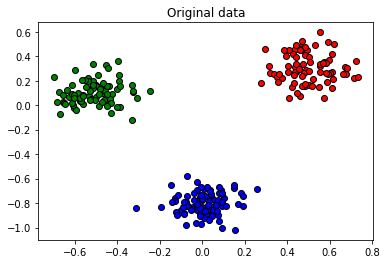

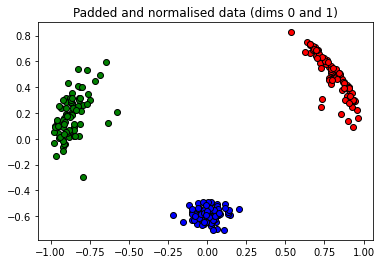

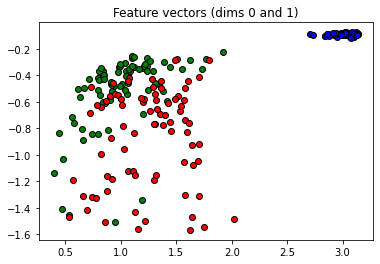

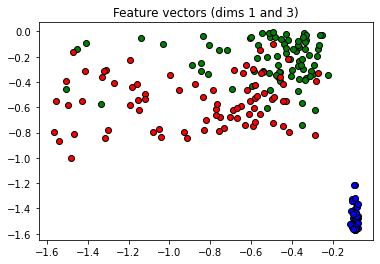

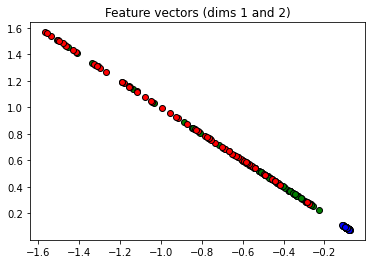

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train[:, 0][Y_train == 1], X_train[:, 1][Y_train == 1], c="b", marker="o", edgecolors="k")
plt.scatter(X_train[:, 0][Y_train == -1], X_train[:, 1][Y_train == -1], c="r", marker="o", edgecolors="k")
plt.scatter(X_train[:, 0][Y_train == 0], X_train[:, 1][Y_train == 0], c="g", marker="o", edgecolors="k")
plt.title("Original data")
plt.show()

plt.figure()
dim1 = 0
dim2 = 1
plt.scatter(
    X_norm[:, dim1][Y_train == 1], X_norm[:, dim2][Y_train == 1], c="b", marker="o", edgecolors="k"
)
plt.scatter(
    X_norm[:, dim1][Y_train == 0], X_norm[:, dim2][Y_train == 0], c="g", marker="o", edgecolors="k"
)
plt.scatter(
    X_norm[:, dim1][Y_train == -1], X_norm[:, dim2][Y_train == -1], c="r", marker="o", edgecolors="k"
)
plt.title("Padded and normalised data (dims {} and {})".format(dim1, dim2))
plt.show()

plt.figure()
dim1 = 0
dim2 = 1
plt.scatter(
    features[:, dim1][Y_train == 1], features[:, dim2][Y_train == 1], c="b", marker="o", edgecolors="k"
)
plt.scatter(
    features[:, dim1][Y_train == 0], features[:, dim2][Y_train == 0], c="g", marker="o", edgecolors="k"
)
plt.scatter(
    features[:, dim1][Y_train == -1], features[:, dim2][Y_train == -1], c="r", marker="o", edgecolors="k"
)
plt.title("Feature vectors (dims {} and {})".format(dim1, dim2))
plt.show()

plt.figure()
dim1 = 1
dim2 = 3
plt.scatter(
    features[:, dim1][Y_train == 1], features[:, dim2][Y_train == 1], c="b", marker="o", edgecolors="k"
)
plt.scatter(
    features[:, dim1][Y_train == 0], features[:, dim2][Y_train == 0], c="g", marker="o", edgecolors="k"
)
plt.scatter(
    features[:, dim1][Y_train == -1], features[:, dim2][Y_train == -1], c="r", marker="o", edgecolors="k"
)
plt.title("Feature vectors (dims {} and {})".format(dim1, dim2))
plt.show()

plt.figure()
dim1 = 1
dim2 = 2
plt.scatter(
    features[:, dim1][Y_train == 1], features[:, dim2][Y_train == 1], c="b", marker="o", edgecolors="k"
)
plt.scatter(
    features[:, dim1][Y_train == 0], features[:, dim2][Y_train == 0], c="g", marker="o", edgecolors="k"
)
plt.scatter(
    features[:, dim1][Y_train == -1], features[:, dim2][Y_train == -1], c="r", marker="o", edgecolors="k"
)
plt.title("Feature vectors (dims {} and {})".format(dim1, dim2))
plt.show()

plt.figure()
dim1 = 2
dim2 = 3
plt.scatter(
    features[:, dim1][Y_train == 1], features[:, dim2][Y_train == 1], c="b", marker="o", edgecolors="k"
)
plt.scatter(
    features[:, dim1][Y_train == 0], features[:, dim2][Y_train == 0], c="g", marker="o", edgecolors="k"
)
plt.scatter(
    features[:, dim1][Y_train == -1], features[:, dim2][Y_train == -1], c="r", marker="o", edgecolors="k"
)
plt.title("Feature vectors (dims {} and {})".format(dim1, dim2))
plt.show()

In [12]:
def statepreparation(a):
        
        qml.RZ(a[0], wires=0)

        qml.CNOT(wires=[0, 1])
        qml.RZ(a[1], wires=1)
        qml.CNOT(wires=[0, 1])
        qml.RZ(a[2], wires=1)
    
        qml.PauliX(wires=0)
        qml.CNOT(wires=[0, 1])
        qml.RZ(a[3], wires=1)
        qml.CNOT(wires=[0, 1])
        qml.RZ(a[4], wires=1)
        qml.PauliX(wires=0)
        
        #Original func start
        # Technically only works with positive numbers
        qml.RY(a[0], wires=0)

        qml.CNOT(wires=[0, 1])
        qml.RY(a[1], wires=1)
        qml.CNOT(wires=[0, 1])
        qml.RY(a[2], wires=1)

        qml.PauliX(wires=0)
        qml.CNOT(wires=[0, 1])
        qml.RY(a[3], wires=1)
        qml.CNOT(wires=[0, 1])
        qml.RY(a[4], wires=1)
        qml.PauliX(wires=0)
        #Original func end
        
        qml.RZ(a[0], wires=1)

        qml.CNOT(wires=[0, 1])
        qml.RZ(a[1], wires=1)
        qml.CNOT(wires=[0, 1])
        qml.RZ(a[2], wires=1)
    
        qml.PauliX(wires=0)
        qml.CNOT(wires=[0, 1])
        qml.RZ(a[3], wires=1)
        qml.CNOT(wires=[0, 1])
        qml.RZ(a[4], wires=1)
        qml.PauliX(wires=0)
        

In [9]:
dev = qml.device("default.qubit", wires=2)

In [10]:
def discretize(p):
    out = 0
    if p < -0.33: out = -1
    if p >= -0.33 and p < 0.33: out = 0
    if p >= 0.33: out = 1
    return out

def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

def accuracy(labels, predictions):
    loss = 0
    for l, p in zip(labels, map(discretize, predictions)):
        if abs(l - p) < 1e-5:
            loss = loss + 1
    loss = loss / len(labels)

    return loss

def layer(W):
    qml.Rot(W[0, 0], W[0, 1], W[0, 2], wires=0)
    qml.Rot(W[1, 0], W[1, 1], W[1, 2], wires=1)
    qml.CNOT(wires=[0, 1])

@qml.qnode(dev)
def circuit(weights, angles):
    statepreparation(angles)

    for W in weights:
        layer(W)

    return qml.expval(qml.PauliZ(0))


def variational_classifier(var, angles):
    weights = var[0]
    bias = var[1]
    return circuit(weights, angles) + bias

def cost(weights, features, labels):
    predictions = [variational_classifier(weights, f) for f in features]
    return square_loss(labels, predictions)

In [15]:
    ##loop for optimization
    num_qubits = 2
    num_layers = 5
    var_init = (0.5*np.random.randn(num_layers, num_qubits, 3), 0.1)
    
    np.random.seed(0)
    num_data = len(Y_train)
    num_train = int(0.75 * num_data)
    index = np.random.permutation(range(num_data))
    #feats_train = features[index[:num_train]]
    #Y_training = Y_train[index[:num_train]]
    #feats_val = features[index[num_train:]]
    #Y_val = Y_train[index[num_train:]]
    feats_train = features
    #Y_train = already loaded as Y_train
    feats_val = x_features
    #Hardcode "1.ans" for training comparison
    Y_val = [1,0,-1,0,-1,1,-1,-1,0,-1,1,-1,0,1,0,-1,-1,0,0,1,1,0,-1,0,0,-1,0,-1,0,0,1,1,-1,-1,-1,0,-1,0,1,0,-1,1,1,0,-1,-1,-1,-1,0,0]
    
    from pennylane.optimize import NesterovMomentumOptimizer

    opt = NesterovMomentumOptimizer(0.1)
    batch_size = 5

    # train the variational classifier
    var = var_init
    for it in range(20):

        # Update the weights by one optimizer step
        batch_index = np.random.randint(0, num_train, (batch_size,))
        feats_train_batch = feats_train[batch_index]
        Y_train_batch = Y_train[batch_index]
        var = opt.step(lambda v: cost(v, feats_train_batch, Y_train_batch), var)

        # Compute predictions on train and validation set
        predictions_train = [variational_classifier(var, f) for f in feats_train]
        predictions_val = [variational_classifier(var, f) for f in feats_val]
        print(predictions_val[0:5])

        # Compute accuracy on train and validation set
        acc_train = accuracy(Y_train, predictions_train)
        acc_val = accuracy(Y_val, predictions_val)

        print(
            "Iter: {:5d} | Cost: {:0.7f} | Acc train: {:0.7f} | Acc validation: {:0.7f} "
            "".format(it + 1, cost(var, features, Y_train), acc_train, acc_val)
        )

[-0.7282467639603795, 0.43758875504696015, -0.04770972148335757, 0.1191743358499202, 0.584017034351805]
Iter:     1 | Cost: 1.8489416 | Acc train: 0.0680000 | Acc validation: 0.3200000 
[-0.3775005553541916, 0.2798117599697716, -0.30203548064805874, -0.019864103254801452, 0.42197438635075846]
Iter:     2 | Cost: 1.2455170 | Acc train: 0.1520000 | Acc validation: 0.4800000 
[0.7791669479442588, 0.2869774853380363, -0.3247416477764633, 0.25170718645188056, 0.4119206906168823]
Iter:     3 | Cost: 0.5626966 | Acc train: 0.4360000 | Acc validation: 0.6600000 
[1.260949678638316, -0.1744363686166432, -0.5342531040631342, -0.016752967758003334, -0.15039231237190892]
Iter:     4 | Cost: 0.2321940 | Acc train: 0.7360000 | Acc validation: 0.7600000 
[1.1614388406143927, -0.4574676212886768, -0.32573395209958766, -0.23244571895830657, -0.5361022905889884]
Iter:     5 | Cost: 0.2885950 | Acc train: 0.5640000 | Acc validation: 0.5600000 
[0.7183360134945918, -0.6772825088513952, -0.2916105635077025